<a href="https://colab.research.google.com/github/zey812/Zahra-Ramadhani/blob/main/Fast%20Food_Capstone%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('fastfood.csv')

In [5]:
df = df.drop(['salad'],axis=1)

In [7]:
df.index = df.index + 1
print(df)

    restaurant                                       item  calories  cal_fat  \
1    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
2    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
3    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
4    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
5    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
511  Taco Bell             Spicy Triple Double Crunchwrap       780      340   
512  Taco Bell                Express Taco Salad w/ Chips       580      260   
513  Taco Bell                     Fiesta Taco Salad-Beef       780      380   
514  Taco Bell                  Fiesta Taco Salad-Chicken       720      320   
515  Taco Bell                    Fiesta Taco Salad-Steak       720      320   

     total_fat  sat_fat  trans_fat  cho

In [22]:
# Menambahkan kolom kelas kalori (calorie_class)
def calorie_category(cal):
    if cal < 400:
        return 'Low'
    elif cal <= 700:
        return 'Medium'
    else:
        return 'High'

df['calorie_class'] = df['calories'].apply(calorie_category)

# Cek distribusi label
print(df['calorie_class'].value_counts())


calorie_class
Medium    210
Low       185
High      120
Name: count, dtype: int64


In [24]:
# Fitur numerik untuk klasifikasi
X = df[['total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium',
        'total_carb', 'fiber', 'sugar', 'protein']]

# Label target
y = df['calorie_class']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
# Cek jumlah missing values di setiap kolom
print("Jumlah NaN per kolom:")
print(X.isnull().sum())

# Tangani missing values: isi NaN dengan nilai rata-rata di tiap kolom numerik
X = X.fillna(X.mean())

# Cek ulang pastikan semua NaN udah hilang
print("\nCek ulang NaN setelah imputasi:")
print(X.isnull().sum())


Jumlah NaN per kolom:
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64

Cek ulang NaN setelah imputasi:
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cek jumlah missing values di setiap kolom
print("Jumlah NaN sebelum dibersihkan:")
print(X.isnull().sum())

# Tangani missing values: isi NaN dengan nilai rata-rata di tiap kolom numerik
# Pastikan X is a DataFrame for .mean()
if not isinstance(X, pd.DataFrame):
    # Assuming X was converted to a numpy array earlier, convert it back to DataFrame
    # This might require knowing the original column names
    # A safer approach is to handle NaN before any conversion to numpy arrays
    # For this specific context, let's assume X is still a DataFrame from the previous cell
    # If not, you'll need to adjust how X is handled.
    print("Warning: X is not a DataFrame. Cannot use X.mean().")
    # As a fallback, you might consider a simpler imputation if X is a numpy array
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    # X = imputer.fit_transform(X)
    # However, let's assume X is a DataFrame based on the previous cell's structure.
    pass
else:
    X = X.fillna(X.mean())

print("\nJumlah NaN setelah dibersihkan:")
print(X.isnull().sum())

# Split ulang data ke training dan testing
# Increase test_size to be at least equal to the number of classes for stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y # Changed test_size from 0.2 to 0.4
)

# Scaling fitur biar model LogisticRegression bisa kerja maksimal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ NaN sudah dibersihkan, sekarang data-nya sudah di-split dan di-scale lho. Siap training nih!")


Jumlah NaN sebelum dibersihkan:
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64

Jumlah NaN setelah dibersihkan:
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64
✅ NaN sudah dibersihkan, sekarang data-nya sudah di-split dan di-scale lho. Siap training nih!


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Prediksi
y_pred = logreg.predict(X_test_scaled)

# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAkurasi:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[0 0 2]
 [0 1 0]
 [1 0 0]]

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      1.00      1.00         1
      Medium       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.25      0.25      0.25         4


Akurasi:
0.25


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi dan training model Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rfc = rfc.predict(X_test_scaled)

# Evaluasi hasil
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rfc))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rfc))

print("\nAkurasi (Random Forest):")
print(accuracy_score(y_test, y_pred_rfc))


Confusion Matrix (Random Forest):
[[24  0  0]
 [ 1 35  1]
 [ 2  0 40]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

        High       0.89      1.00      0.94        24
         Low       1.00      0.95      0.97        37
      Medium       0.98      0.95      0.96        42

    accuracy                           0.96       103
   macro avg       0.95      0.97      0.96       103
weighted avg       0.96      0.96      0.96       103


Akurasi (Random Forest):
0.9611650485436893


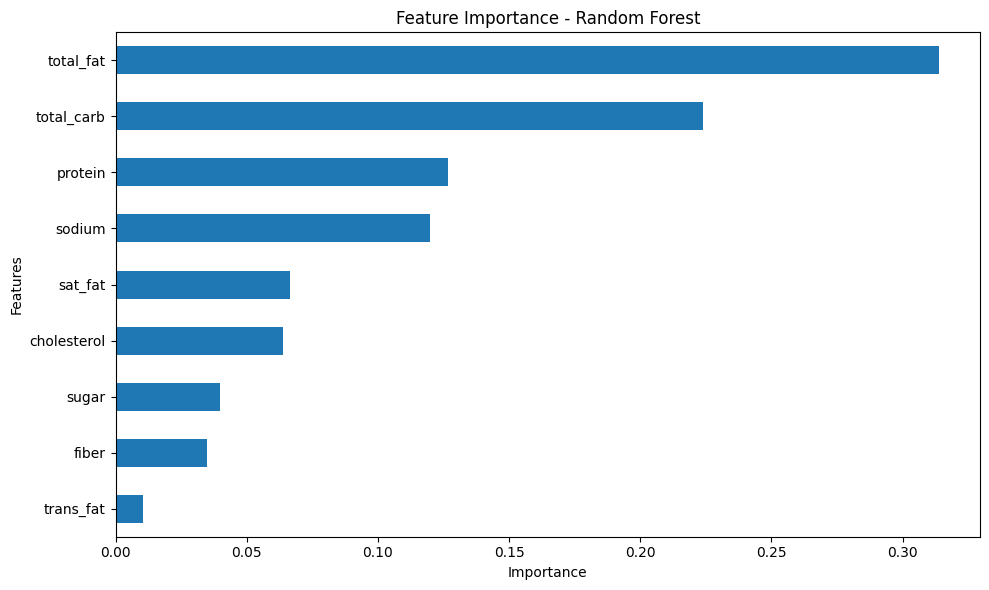

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil feature importance
importances = rfc.feature_importances_
feature_names = X.columns

# Buat DataFrame dan sort
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

# Visualisasikan
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-2388140061.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_count, x='high_calorie_count', y='restaurant', palette='Reds_r')


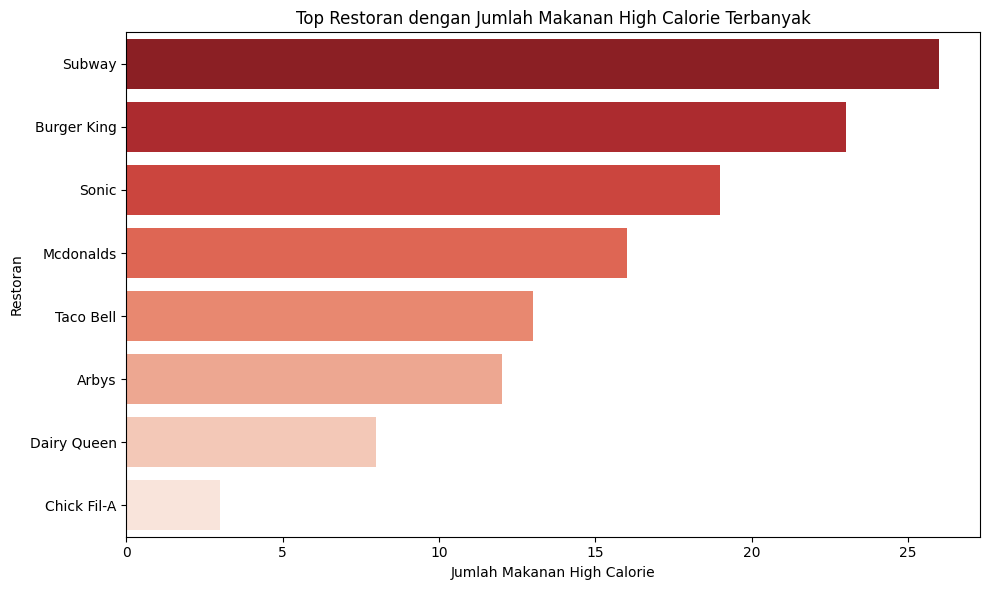

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter makanan yang masuk kategori High
high_calorie = df[df['calorie_class'] == 'High']

# Hitung jumlah makanan High per restoran
high_count = high_calorie['restaurant'].value_counts().reset_index()
high_count.columns = ['restaurant', 'high_calorie_count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=high_count, x='high_calorie_count', y='restaurant', palette='Reds_r')
plt.title('Top Restoran dengan Jumlah Makanan High Calorie Terbanyak')
plt.xlabel('Jumlah Makanan High Calorie')
plt.ylabel('Restoran')
plt.tight_layout()
plt.show()


In [34]:
# 1. Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Definisi fitur dan target
X = df[['total_fat', 'total_carb', 'protein', 'sodium', 'sat_fat', 'cholesterol', 'sugar', 'fiber', 'trans_fat']]
y = df['restaurant']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train model
model_restoran = RandomForestClassifier(random_state=42)
model_restoran.fit(X_train_scaled, y_train)

# 6. Evaluasi model
y_pred_restoran = model_restoran.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_restoran))
print("\nClassification Report:\n", classification_report(y_test, y_pred_restoran))


Confusion Matrix:
 [[ 7  0  2  1  1  1  1  3]
 [ 1 15  1  0  1  1  1  1]
 [ 3  1  1  0  2  0  0  1]
 [ 0  5  0  3  0  1  1  3]
 [ 0  5  0  2  4  0  5  1]
 [ 3  0  0  1  4  6  0  2]
 [ 1  0  1  0  1  0 25  1]
 [ 0  0  0  0  0  0  1 34]]

Classification Report:
               precision    recall  f1-score   support

       Arbys       0.47      0.44      0.45        16
 Burger King       0.58      0.71      0.64        21
 Chick Fil-A       0.20      0.12      0.15         8
 Dairy Queen       0.43      0.23      0.30        13
   Mcdonalds       0.31      0.24      0.27        17
       Sonic       0.67      0.38      0.48        16
      Subway       0.74      0.86      0.79        29
   Taco Bell       0.74      0.97      0.84        35

    accuracy                           0.61       155
   macro avg       0.52      0.49      0.49       155
weighted avg       0.58      0.61      0.58       155



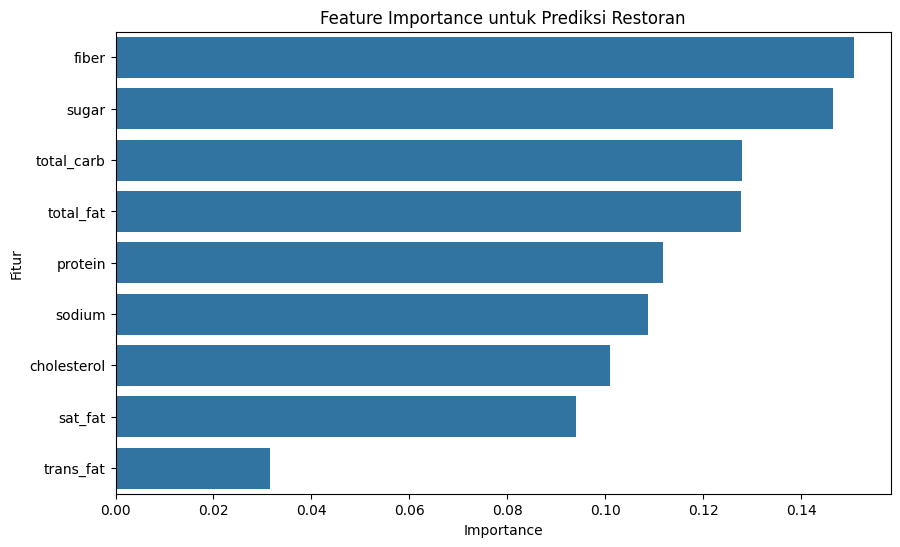

In [36]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': model_restoran.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Fitur')
plt.title('Feature Importance untuk Prediksi Restoran')
plt.show()


/tmp/ipython-input-52-3280173365.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_calories.values, y=avg_calories.index, ax=axes[0], palette='Reds_r')
/tmp/ipython-input-52-3280173365.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_calorie_counts.values, y=high_calorie_counts.index, ax=axes[1], palette='Oranges')


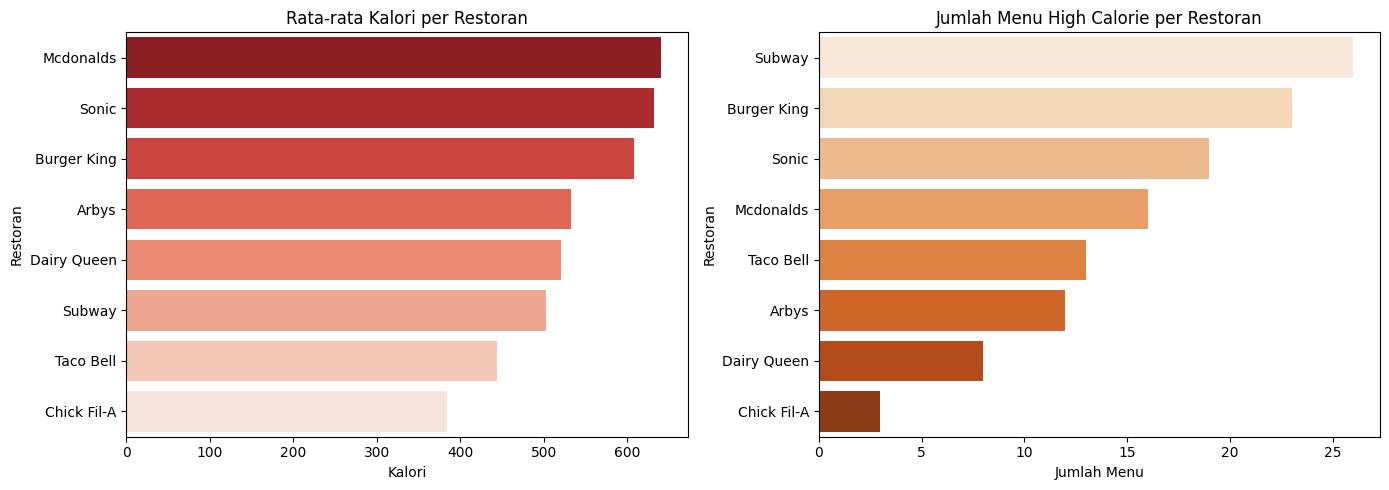

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom calorie_class kalau belum ada
def classify_calorie(val):
    if val < 400:
        return 'Low'
    elif 400 <= val <= 700:
        return 'Medium'
    else:
        return 'High'

df['calorie_class'] = df['calories'].apply(classify_calorie)

# Rata-rata kalori per restoran
avg_calories = df.groupby('restaurant')['calories'].mean().sort_values(ascending=False)

# Jumlah menu High Calorie per restoran
high_calorie_counts = df[df['calorie_class'] == 'High']['restaurant'].value_counts()

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=avg_calories.values, y=avg_calories.index, ax=axes[0], palette='Reds_r')
axes[0].set_title('Rata-rata Kalori per Restoran')
axes[0].set_xlabel('Kalori')
axes[0].set_ylabel('Restoran')

sns.barplot(x=high_calorie_counts.values, y=high_calorie_counts.index, ax=axes[1], palette='Oranges')
axes[1].set_title('Jumlah Menu High Calorie per Restoran')
axes[1].set_xlabel('Jumlah Menu')
axes[1].set_ylabel('Restoran')

plt.tight_layout()
plt.show()


In [73]:
long_text = """
Dataset yang digunakan mencakup lebih dari 500 menu makanan dari berbagai restoran cepat saji terkenal di Amerika Serikat. Setiap entri menyajikan informasi nutrisi seperti kalori, total lemak, lemak jenuh, karbohidrat, gula, protein, dan lainnya. Proyek ini bertujuan mengklasifikasikan makanan berdasarkan kandungan kalorinya, serta menyusun rangkuman wawasan berdasarkan distribusi kalori dan pola penyajian menu oleh tiap restoran.

🔎 Temuan Utama Berdasarkan Analisis:
McDonald's menduduki posisi pertama sebagai restoran dengan rata-rata kalori per menu tertinggi , mencapai lebih dari 640 kalori per item. Menu andalan seperti Double Bacon Smokehouse Burger (1130 kalori) dan Crispy Bacon Smokehouse Chicken Sandwich (920 kalori) menjadi penyumbang utama tingginya nilai ini.

Sonic menyusul dengan rata-rata kalori tinggi, didorong oleh pilihan menu seperti burger ganda dan porsi minuman manis yang besar. Burger King juga memiliki rata-rata kalori yang tinggi, terutama pada produk seperti Whopper dan King Sandwich Series .

Di sisi lain, jika dilihat dari jumlah total menu yang masuk kategori high kalori (≥ 700 kalori) , Subway menempati peringkat pertama . Subway dikenal dengan sandwich-nya yang fleksibel—meski memiliki banyak pilihan menu rendah kalori, banyak pula item dengan ukuran besar dan topping tambahan yang menyebabkan kalorinya melonjak. Subway memiliki lebih dari 25 item berkalori tinggi , menjadikan restoran dengan jumlah variasi makanan tinggi kalori terbanyak.

Meskipun McDonald's hanya berada di posisi keempat dalam hal jumlah menu tinggi kalori , tinggi rata-rata kalori menunjukkan bahwa sebagian besar menu utama mereka memang sangat padat kalori .

Restoran seperti Taco Bell, Arby's, dan Dairy Queen berada di tengah-tengah distribusi, dengan beberapa item masuk kategori tinggi kalori, tetapi juga menawarkan banyak menu dengan kalori yang lebih ringan.
"""


In [79]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

summary_output = summarizer(long_text, max_length=200, min_length=30, do_sample=False)
print("=== Ringkasan Otomatis ===\n")
print(summary_output[0]['summary_text'])


Device set to use cpu


=== Ringkasan Otomatis ===

Dataset yang digunakan mencakup lebih dari 500 menu makanan dari berbagai restoran cepat saji terkenal di Amerika Serikat. Setiap entri menyajikan informasi nutrisi seperti kalori, total lemak, jenuh, karbohidrat, gula, protein, dan lainnya. Proyek ini bertujuan mengklasifikasikan kandungan kalorinya.
